<a href="https://colab.research.google.com/github/selouhmmd/silouhmmd/blob/master/Twitter_fake_account_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Twitter Fake Account Detection**

**Problem Difinition**
> Given an account , the model will classify it as fake or real account

**Discibe the Dataset**
> The dataset contains 501 fake account and 499 real account ,the number is approximative to balance the number of data in each class , Each account is described with 16 feature.

 *  **Description**: Length of the user defined string describing the account 
 *  **Protected**:When true indicates that this user has chosen to protect their Tweets .
 * **followers_count** :The number of followers this account currently has.
 * **friends_count** : The number of users this account is following 
 *  **statuses_count**: The number of Tweets (including retweets)issued by the user.
 *  **favorites_count**: The number of Tweets this user has 
liked in the account’s lifetime.
 *  **listed_count** : The number of public lists that this 
user is a member of. 
 *  **Verified** :When true, indicates that the user has a verified account 
 *  **profile_use_backgroung_image**: When true, indicates the user wants their uploaded background image to be used 
 *  **contributors_enabled**: Indicates that the user has an 
account with “contributor mode” 
enabled, allowing for Tweets 
issued by the user to be co-authored by another account.
 *  **default_profile** : When true, indicates that the user 
has not altered the theme or 
background of their user profile
 *  **default_profile_image** : When true, indicates that the user 
has not uploaded their own profile 
image and a default image is used 
instead 
 *  **is_translator** : When true, indicates that the user is a participant in Twitter’s ranslator 
community 
 *  **hashtags_average** : Number of hashtags that user has used in last 20 tweets 
 *  **mentions_average**: Number of mentions that user has used in last 20 tweets
 *  **urls_average**: Number of URL links that user has used in last 20 tweets 
  


#Loading Libraries

In [26]:
%matplotlib inline
import os
print(os.listdir())


import warnings
warnings.filterwarnings('ignore')

#loading dataset
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skplt

#data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#data modeling
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#model evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

['.config', 'data.csv', 'sample_data']


#Loading Data

In [27]:
accounts = pd.read_csv(r'data.csv')
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1000 non-null   int64  
 1   'protected'                     1000 non-null   bool   
 2   'followers_count'               1000 non-null   int64  
 3   'friends_count'                 1000 non-null   int64  
 4   'favourites_count'              1000 non-null   int64  
 5   'profile_use_background_image'  1000 non-null   bool   
 6   'hashtags_average'              1000 non-null   float64
 7   'mentions_average'              1000 non-null   float64
 8   'urls_average'                  1000 non-null   float64
 9   'description'                   1000 non-null   int64  
 10  'statuses_count'                1000 non-null   int64  
 11  'listed_count'                  1000 non-null   int64  
 12  'verified'                      100

the dataset contains 1000 row , each row has 16 columns (feature) , it consists of 8 boolean value , 3 float value , 7 int valus , it has no null values.

In [28]:
accounts.duplicated().any()
dup = accounts.duplicated()
accounts[dup]

,id,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'


the dataset have no duplicated values

In [29]:
accounts = accounts.drop("id" , axis=1)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   'protected'                     1000 non-null   bool   
 1   'followers_count'               1000 non-null   int64  
 2   'friends_count'                 1000 non-null   int64  
 3   'favourites_count'              1000 non-null   int64  
 4   'profile_use_background_image'  1000 non-null   bool   
 5   'hashtags_average'              1000 non-null   float64
 6   'mentions_average'              1000 non-null   float64
 7   'urls_average'                  1000 non-null   float64
 8   'description'                   1000 non-null   int64  
 9   'statuses_count'                1000 non-null   int64  
 10  'listed_count'                  1000 non-null   int64  
 11  'verified'                      1000 non-null   bool   
 12  'contributors_enabled'          100

**Encode categorical Data**

Random Forest classifier can't deal with non-numerical data.

In [30]:
pro_encoder = LabelEncoder()
accounts["'protected'"] = pro_encoder.fit_transform(accounts["'protected'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,True,0.10,0.85,0.35,101,3415,2,False,False,False,False,False,False
1,0,19,128,479,True,0.05,0.60,0.00,0,140,0,False,False,True,False,False,False
2,0,121,53,1567,True,0.20,0.35,0.00,67,1242,0,False,False,False,False,False,False
3,0,4112,710,1129,True,0.75,0.50,0.00,35,8066,3,False,False,False,False,False,False
4,0,304,175,3424,True,0.85,1.10,0.00,69,1525,0,False,False,True,False,False,False


In [31]:
pro_img_bg_encoder = LabelEncoder()
accounts["'profile_use_background_image'"] = pro_img_bg_encoder.fit_transform(accounts["'profile_use_background_image'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,False,False,False,False,False,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,False,False,True,False,False,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,False,False,False,False,False,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,False,False,False,False,False,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,False,False,True,False,False,False


In [32]:
ver_encoder = LabelEncoder()
accounts["'verified'"] = ver_encoder.fit_transform(accounts["'verified'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,0,False,False,False,False,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,0,False,True,False,False,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,0,False,False,False,False,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,0,False,False,False,False,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,0,False,True,False,False,False


In [33]:
contr_encoder = LabelEncoder()
accounts["'contributors_enabled'"] = contr_encoder.fit_transform(accounts["'contributors_enabled'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,0,0,False,False,False,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,0,0,True,False,False,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,0,0,False,False,False,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,0,0,False,False,False,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,0,0,True,False,False,False


In [34]:
def_pro_encoder = LabelEncoder()
accounts["'default_profile'"] = def_pro_encoder.fit_transform(accounts["'default_profile'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,0,0,0,False,False,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,0,0,1,False,False,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,0,0,0,False,False,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,0,0,0,False,False,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,0,0,1,False,False,False


In [35]:
img_def_pro_encoder = LabelEncoder()
accounts["'default_profile_image'"] = img_def_pro_encoder.fit_transform(accounts["'default_profile_image'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,0,0,0,0,False,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,0,0,1,0,False,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,0,0,0,0,False,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,0,0,0,0,False,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,0,0,1,0,False,False


In [36]:
trans_encoder = LabelEncoder()
accounts["'is_translator'"] = trans_encoder.fit_transform(accounts["'is_translator'"])
accounts.head()

,'protected','followers_count','friends_count','favourites_count','profile_use_background_image','hashtags_average','mentions_average','urls_average','description','statuses_count','listed_count','verified','contributors_enabled','default_profile','default_profile_image','is_translator','is_fake'
0,0,2232,414,4227,1,0.10,0.85,0.35,101,3415,2,0,0,0,0,0,False
1,0,19,128,479,1,0.05,0.60,0.00,0,140,0,0,0,1,0,0,False
2,0,121,53,1567,1,0.20,0.35,0.00,67,1242,0,0,0,0,0,0,False
3,0,4112,710,1129,1,0.75,0.50,0.00,35,8066,3,0,0,0,0,0,False
4,0,304,175,3424,1,0.85,1.10,0.00,69,1525,0,0,0,1,0,0,False


#Data Preprocessing



1.   Sepatae Class from features



In [37]:
accounts_features = accounts.drop("'is_fake'" , axis=1)
accounts_labels = accounts["'is_fake'"]

2.  Scale Features

Scaling data means to make all values in all variables within the same range (around 0-1)

In [38]:
scaler = StandardScaler()

accounts_features_scaled = scaler.fit_transform(accounts_features)


3.  Data Splitting

In [59]:
tr_val_f, test_features, tr_val_l, test_labels = train_test_split(
    accounts_features_scaled, accounts_labels, test_size = 0.3, stratify = accounts_labels)

In [60]:
train_features, val_features, train_labels, val_labels = train_test_split(
    tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

In [61]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape,   test_labels.shape

((400, 16), (400,), (300, 16), (300,), (300, 16), (300,))

#RSA

initX is a function to initialize our population, where :    
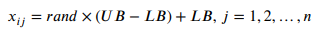
*  dim : the number of colunms,
*  Lb, Ub : number of bounderies
*  N : number of rows.
*  Pram : arrays of the hyperparameters

In [17]:
def initX(dim , Lb, Ub , N , *Pram):
  X=np.zeros((N,dim))
  i=0
  
  for p in Pram:
    for j in range (len(p)):
      #print(p[j])
      X[i,j]=p[j]*(Ub-Lb)+Lb
    i=i+1
    
  X=X.transpose()
  return X

F_get() defines the first four fuctions of the 23 classical test functions

In [18]:
def F_get(Foo , x):
  if Foo =='F1':
      return {
          "o" : np.sum(x),
          "Lb" : -100,
          "Ub" : 100,
          "Dim" : 10,
      }
  elif Foo == 'F2':
      return {
          "o" : np.sum(abs(x)) + np.prod(abs(x)),        
          "Lb" : -10,
          "Ub" : 10,
          "Dim" : 10, 
      }
  elif Foo == 'F3':
      o=0
      for i in range(len(x)):
        o=o+np.sum(x)**2
      return { 
          "o" : o,        
          "Lb" : -100,
          "Ub" : 100,
          "Dim" : 10, 
      }
  elif Foo == 'F4':
      o = np.maximum(np.absolute(x))
      return { 
          "o" : o,         
          "Lb" : -100,
          "Ub" : 100,
          "Dim" : 10, 
      }

RSA() is reptile search algorithme where:

In [80]:
import numpy as np
import random as rd



def RSA (N , T , Lb , Ub  , Dim , SF_obj , population):
  
  Best_F = 9999999999999999999  #best fitness
  X= population                 # init the positions
  Best_P = np.zeros(len(X[1]))  #best position
  Xnew= X
  



  t= 0                     #starting iteration
  alpha= 0.1                 # alpha=0.1
  beta= 0.005                 # beta = 0.005
  Ffun = np.zeros(len(X))  
  Ffun_new = np.zeros(len(X))
  eps= np.finfo(np.float64).eps
  #eps=0
  
  


  #Calculate the fitness
  for i in range(len(X)):
    F_obj = F_get(SF_obj , X[i])["o"]
    Ffun[i] = F_obj
    if Ffun[i] < Best_F:
      Best_F = Ffun[i]
      Best_P = X[i]
      

  while t < T+1 :         #update postion of solutions
    ES = 2 * rd.uniform(-1,1) *(1-(t/T))
    for i in range(2,len(X)):
      for j in range(len(X[1])):
        R=Best_P[j]-X[rd.randint(1 ,len(X))-1 , j]/((Best_P[j])+eps)
        P=alpha+(X[i,j]-np.mean(X[i]))/(Best_P[j]*(Ub-Lb)+eps)
        Eta=Best_P[j]*P

        if t<T/4:
          Xnew[i,j]=Best_P[j] - Eta*beta-R*np.random.uniform(-1,1)
        elif t<2*T/4 and t>=T/4:
          Xnew[i,j]=Best_P[j]*X[np.random.randint(1,len(X)) ,j]*eps*np.random.uniform(-1,1)
        elif t<3*T/4 and t>=2*T/4:
          Xnew[i,j]=Best_P[j]*P*np.random.uniform(-1,1)
        else :
          Xnew[i,j]=Best_P[j]-Eta*eps-R*np.random.uniform(-1,1)
        
        #check if the new values exceed the boundaries
        
        Flag_Ub = Ub
        #print(Flag_Ub)
        
        Flag_Lb = Lb
        #print(Flag_Lb)

        Xnew[i] = (((np.multiply(Xnew[i] ,(Flag_Ub+Flag_Lb))+ np.multiply(Ub , Flag_Ub) + np.multiply(Lb, Flag_Lb)))-Lb)/(Ub-Lb)
        F_obj=F_get(SF_obj , Xnew[i])["o"]
        Ffun_new[i] = F_obj

        if Ffun_new[i]<Ffun[i]:
          X[i]=Xnew[i]
          Ffun[i]=Ffun_new[i]

        if Ffun[i]<Best_F:
          Best_F=Ffun[i]
          Best_P=Xnew[i]

      #convp[t]= Best_F

      t=t+1
  print('best positions are :',Best_P)






In [81]:
population=initX(5,1 , 100 , 3, [10, 15, 20, 25, 30], [5, 10, 15, 20, 25],[1, 2, 3, 4, 5])
RSA(5,500,1,100,10,'F3',population)

best positions are : [3969.77672602 5085.02250833  222.00877934]


In [82]:
popula =initX(4,1 , 10 , 2, [0.1,1,10,100], [0.0001 , 10 ,1 , 0.1])
print(popula)

RSA(4,500,1,100,10,'F3',popula)

[[  1.9      1.0009]
 [ 10.      91.    ]
 [ 91.      10.    ]
 [901.       1.9   ]]
best positions are : [1.9    1.0009]


#Modelling

to train our model we will use:
1. Random Forest Classifier
  *  tunned with GridSearch
  *  tunned with RSA
2. SVM
  * without tunning
  * tunned using RSA 

In [42]:
f1 = make_scorer(f1_score, average = "weighted")

**Random Forest using Grid Search**

In [43]:
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

In [44]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = f1, cv = 5)

In [63]:
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring=make_scorer(f1_score, average=weighted))

In [64]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 35}

In [65]:
model = RandomForestClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 1)
model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=15, n_estimators=35)

In [66]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.
    
    Arguments: 
        Estimator, features (X) and labels (y).
    
    Returns: 
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [67]:
classification_task(model, train_features, train_labels)

Accuracy: 1.0
F1 score: 1.0


In [68]:
classification_task(model, val_features, val_labels)


Accuracy: 0.8733333333333333
F1 score: 0.8733333333333333


In [69]:
classification_task(model, test_features, test_labels)

Accuracy: 0.9333333333333333
F1 score: 0.9333214793741107


              precision    recall  f1-score   support

       False       0.95      0.92      0.93       150
        True       0.92      0.95      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



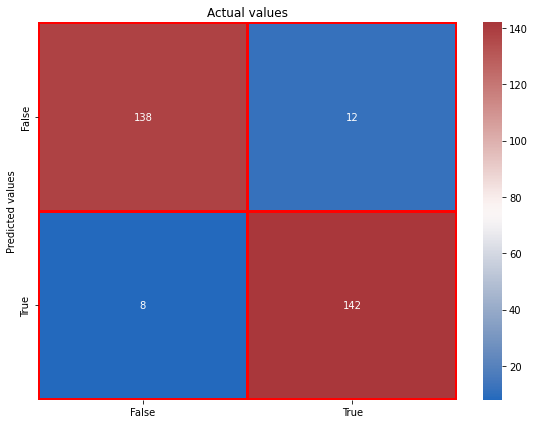

In [70]:
print(classification_report(test_labels, model.predict(test_features)))

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

**Random Forest using RSA**

In [83]:
model = RandomForestClassifier(n_estimators = 3969, max_depth = 5085, min_samples_leaf = 222)
model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=5085, min_samples_leaf=222, n_estimators=3969)

In [84]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.
    
    Arguments: 
        Estimator, features (X) and labels (y).
    
    Returns: 
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [85]:
classification_task(model, train_features, train_labels)

Accuracy: 0.5025
F1 score: 0.3361148086522462


In [86]:
classification_task(model, val_features, val_labels)

Accuracy: 0.5
F1 score: 0.3333333333333333


In [87]:
classification_task(model, test_features, test_labels)

Accuracy: 0.5
F1 score: 0.3333333333333333


              precision    recall  f1-score   support

       False       0.00      0.00      0.00       150
        True       0.50      1.00      0.67       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300



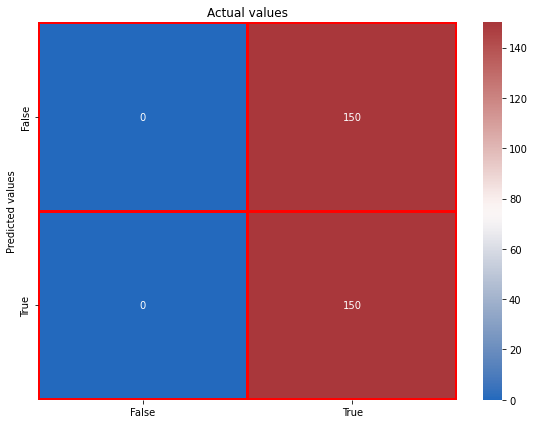

In [88]:
print(classification_report(test_labels, model.predict(test_features)))

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

**SVM**



Accuracy of Support Vector Classifier: 55.333333333333336 

              precision    recall  f1-score   support

       False       1.00      0.11      0.19       150
        True       0.53      1.00      0.69       150

    accuracy                           0.55       300
   macro avg       0.76      0.55      0.44       300
weighted avg       0.76      0.55      0.44       300



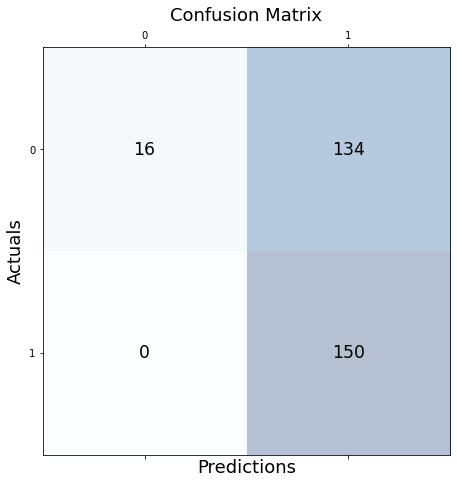

In [99]:
svc =  SVC(kernel='rbf', C=3 , gamma= 0.0001)
svc.fit(train_features, train_labels)
svc_predicted = svc.predict(test_features)
svc_conf_matrix = confusion_matrix(test_labels, svc_predicted)



svc_acc_score = accuracy_score(test_labels, svc_predicted)

print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(test_labels,svc_predicted))



fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(svc_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(svc_conf_matrix.shape[0]):
    for j in range(svc_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=svc_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



Accuracy of Support Vector Classifier: 83.66666666666667 

              precision    recall  f1-score   support

       False       0.84      0.83      0.84       150
        True       0.83      0.84      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



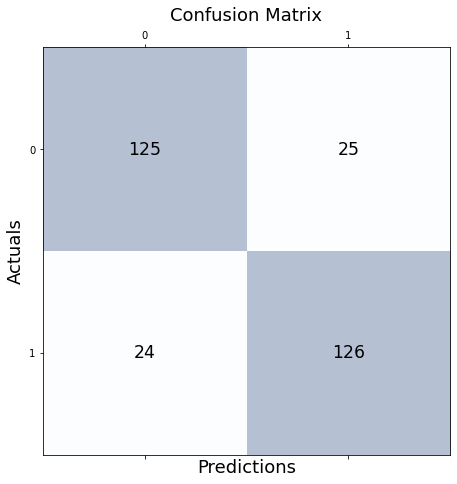

In [98]:
svc =  SVC(kernel='rbf', C=1.9 , gamma=1.0009)
svc.fit(train_features, train_labels)
svc_predicted = svc.predict(test_features)
svc_conf_matrix = confusion_matrix(test_labels, svc_predicted)



svc_acc_score = accuracy_score(test_labels, svc_predicted)

print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(test_labels,svc_predicted))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(svc_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(svc_conf_matrix.shape[0]):
    for j in range(svc_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=svc_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
